<a href="https://colab.research.google.com/github/MarkKasidit/Stock-Price-Prediction-using-Facebook_Prophet./blob/main/StockPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tesla (TSLA) Stock Price prediction using Facebook Prophet

## Importing all the necessary Libraries

In [1]:
import pandas as pd
import plotly.express as px
import prophet
from prophet import Prophet

#Initializing Plotly
import plotly.io as pio
pio.renderers.default='colab'

## Importing the Dataset & Exploring it

In [2]:
df = pd.read_csv("TSLA.csv")
df.head()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,213.399286,217.970383,208.347129,213.168638,213.168638,1.249849e+08
std,53.542402,53.984966,52.881683,53.271339,53.271339,4.903116e+07
min,103.000000,111.750000,101.809998,108.099998,108.099998,4.186470e+07
25%,176.902500,182.459999,172.507496,178.762501,178.762501,8.679818e+07
50%,198.919998,203.474998,193.599998,197.684998,197.684998,1.200864e+08
75%,263.974998,268.300004,258.645012,263.262497,263.262497,1.598709e+08
max,311.666656,314.666656,305.579987,309.320007,309.320007,3.065906e+08


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [ ]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [6]:
px.area(df, x="Date", y="Close")

In [7]:
px.line(df, x="Date", y="Close")

In [8]:
px.area(df, x="Date", y="Volume")

In [9]:
px.bar(df, y="Volume")

In [10]:
px.box(df, y="Close")

# Understanding Facebook Prophet

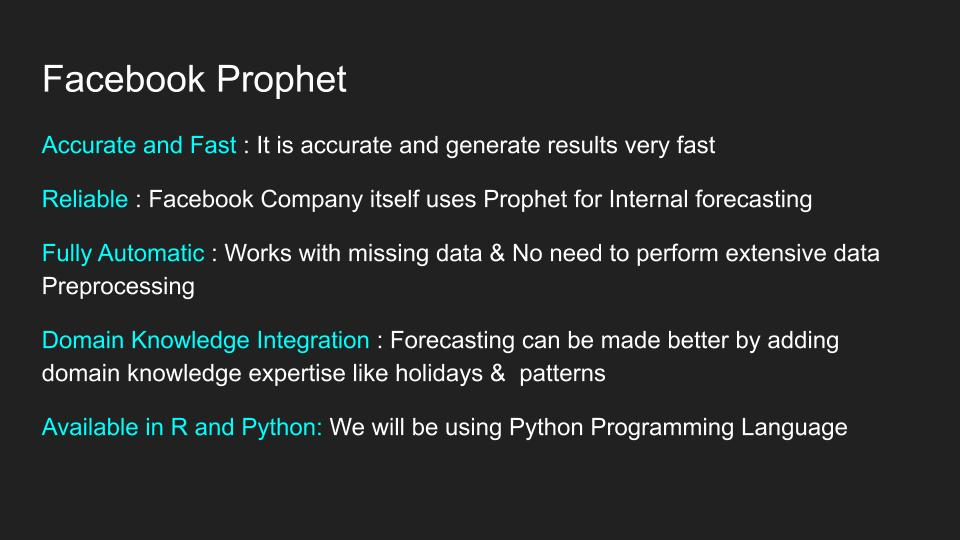

## Data Preperation

In [11]:
columns=['Date', 'Close']
ndf = pd.DataFrame(df, columns=columns)
ndf.head()

In [13]:
prophet_df = ndf.rename(columns={'Date':'ds', 'Close':'y'})
prophet_df.head()

## Creating Facebook Prophet Model

In [15]:
m=Prophet()
m.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3iluutgt/d9x40x28.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3iluutgt/p_dt5h00.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81404', 'data', 'file=/tmp/tmp3iluutgt/d9x40x28.json', 'init=/tmp/tmp3iluutgt/p_dt5h00.json', 'output', 'file=/tmp/tmp3iluutgt/prophet_modelj2de8aog/prophet_model-20240512171157.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:11:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:11:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


##Forecasting

In [16]:
future = m.make_future_dataframe(periods=30)
forecast=m.predict(future)

In [17]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-08-01,314.940352,290.739764,347.807330,314.940352,314.940352,4.531600,4.531600,4.531600,4.531600,4.531600,4.531600,0.0,0.0,0.0,319.471952
1,2022-08-02,313.785283,289.377764,344.243241,313.785283,313.785283,3.027151,3.027151,3.027151,3.027151,3.027151,3.027151,0.0,0.0,0.0,316.812434
2,2022-08-03,312.630214,289.791012,345.330121,312.630214,312.630214,4.193596,4.193596,4.193596,4.193596,4.193596,4.193596,0.0,0.0,0.0,316.823810
3,2022-08-04,311.475145,286.507771,342.857280,311.475145,311.475145,3.275068,3.275068,3.275068,3.275068,3.275068,3.275068,0.0,0.0,0.0,314.750213
4,2022-08-05,310.320077,284.320902,340.589836,310.320077,310.320077,3.578362,3.578362,3.578362,3.578362,3.578362,3.578362,0.0,0.0,0.0,313.898439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,2023-08-27,306.986247,270.232340,326.501399,304.361019,309.497219,-9.302892,-9.302892,-9.302892,-9.302892,-9.302892,-9.302892,0.0,0.0,0.0,297.683355
278,2023-08-28,308.047207,286.615560,341.098737,305.252064,310.795432,4.531600,4.531600,4.531600,4.531600,4.531600,4.531600,0.0,0.0,0.0,312.578808
279,2023-08-29,309.108168,283.360531,338.518394,306.138099,312.110567,3.027151,3.027151,3.027151,3.027151,3.027151,3.027151,0.0,0.0,0.0,312.135319
280,2023-08-30,310.169128,286.086054,341.926566,307.058954,313.354126,4.193596,4.193596,4.193596,4.193596,4.193596,4.193596,0.0,0.0,0.0,314.362724


In [18]:
px.line(forecast, x="ds", y="yhat")

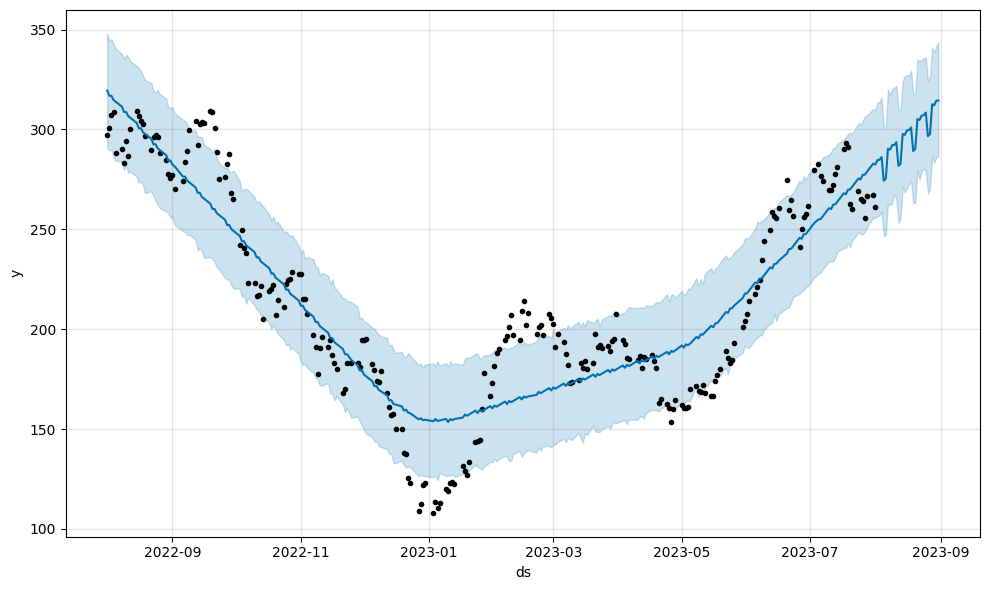

In [19]:
figure = m.plot(forecast, xlabel='ds', ylabel='y')

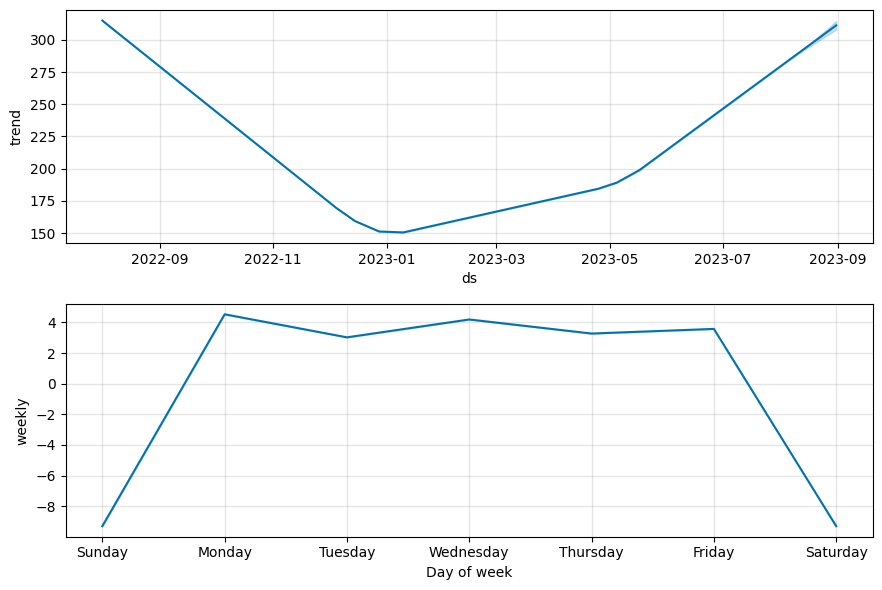

In [20]:
figure2 = m.plot_components(forecast)

##Downloading the Forecast data

In [21]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Apply the Model with updated data

In [44]:
# pip install yfinance
import yfinance as yf
import pandas as pd

def prepare_data(stock, start_date="2023-01-01", end_date="2024-01-01"):
  data = yf.download(stock, start_date, end_date)
  df = pd.DataFrame(data)
  df['Date'] = df.index
  df.reset_index(drop=True, inplace=True)
  ndf = pd.DataFrame(df, columns=['Date', 'Close'])
  prophet_df = ndf.rename(columns={'Date':'ds', 'Close':'y'})
  return prophet_df

prophet_df = prepare_data('TSLA')
display(prophet_df)

[*********************100%%**********************]  1 of 1 completed


,ds,y
0,2023-01-03,108.099998
1,2023-01-04,113.639999
2,2023-01-05,110.339996
3,2023-01-06,113.059998
4,2023-01-09,119.769997
...,...,...
245,2023-12-22,252.539993
246,2023-12-26,256.609985
247,2023-12-27,261.440002
248,2023-12-28,253.179993


In [47]:
import prophet
from prophet import Prophet

def close_price_predict(prophet_df, pd_periods=30):
  model = Prophet()
  model.fit(prophet_df)
  future = model.make_future_dataframe(periods=pd_periods)
  forecast = model.predict(future)
  return forecast
forecast = close_price_predict(prophet_df, 30)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3iluutgt/237kot3q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3iluutgt/pvbjb4q6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68726', 'data', 'file=/tmp/tmp3iluutgt/237kot3q.json', 'init=/tmp/tmp3iluutgt/pvbjb4q6.json', 'output', 'file=/tmp/tmp3iluutgt/prophet_model6gbi35x_/prophet_model-20240512175031.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:50:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:50:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [49]:
px.line(forecast, x="ds", y="yhat")

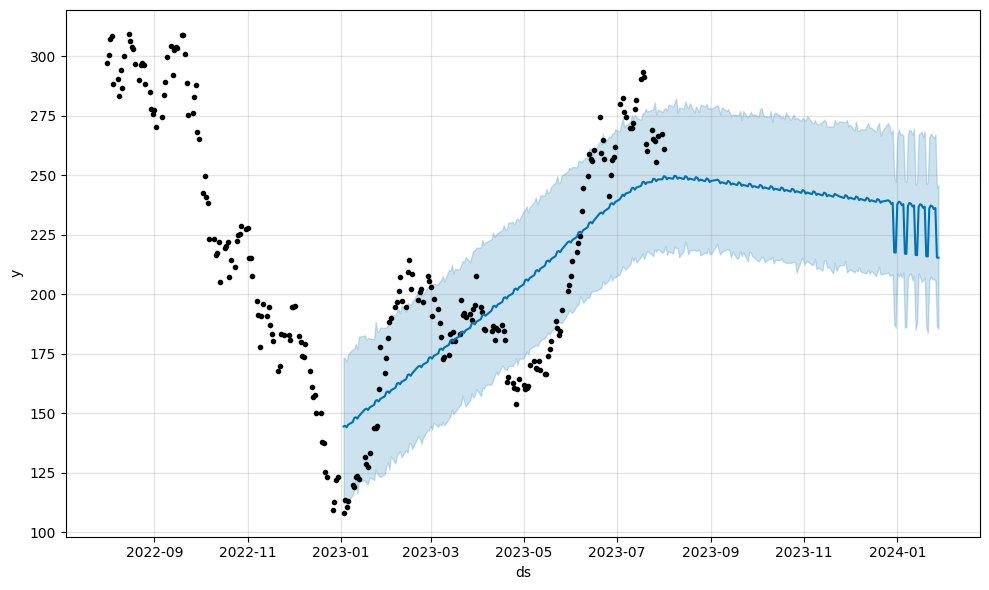

In [50]:
figure = m.plot(forecast, xlabel='ds', ylabel='y')

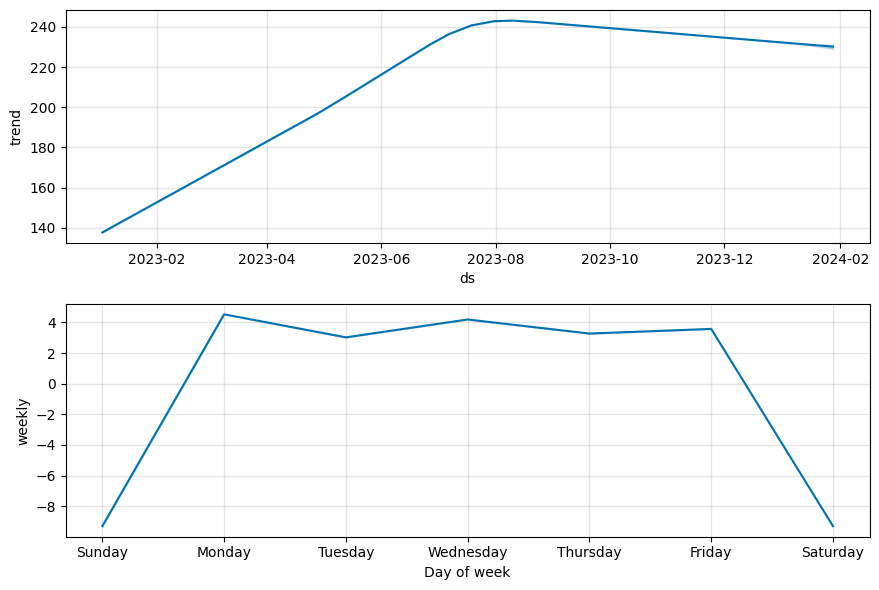

In [51]:
figure2 = m.plot_components(forecast)

In [52]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>